### 1. Introduction


The following case study delves into the intricacies of retail price optimization within the context of a dynamic clothing store named "Fashionista." This establishment showcases an extensive array of clothing and accessories through its physical outlets and online e-commerce platform. The core objective for Fashionista is to refine its pricing strategy in order to amplify revenue generation and heighten its competitive stance within the market.

Navigating the intricate landscape of retail pricing presents Fashionista with a series of formidable challenges:

**Competitive Landscape:** The retail sector stands characterized by fierce competition, with multiple rivals vying for customer attention. Fashionista aspires to carve out a distinctive niche by offering enticing price points while upholding profitability.

**Inventory Management:** The delicate equilibrium between supply and demand necessitates an astute approach to inventory management. Ensuring optimal pricing in accordance with inventory levels becomes pivotal in averting both stock surpluses and deficits.

**Seasonal and Trend Fluctuations:** The ever-shifting trends within the realm of fashion, coupled with the seasonal ebb and flow of customer preferences, mandate an adaptable pricing approach. Fashionista must nimbly recalibrate its pricing strategy to seamlessly resonate with these oscillating patterns.

**Solution: Retail Price Optimization Implementation**

The journey towards optimal pricing strategy entails a multifaceted approach:

**Data Collection and Analysis:** Fashionista embarks on data collection, collating insights from diverse sources such as historical sales records, competitor price points, customer demographics, and analytical insights from its online platform. This wealth of information is subjected to meticulous analysis, unveiling underlying trends, correlations, and patterns.

**Demand Forecasting:** Leveraging sophisticated analytics methodologies, Fashionista orchestrates the construction of demand forecasting models. These models synthesize myriad variables such as seasonality, trends, promotional endeavors, and external influencers like economic conditions or festive occasions. The outcome is an accurate prediction of customer demand across various products and their associated price brackets.

**Price Elasticity Analysis:** Employing a rigorous exploration of price elasticity, Fashionista delves into comprehending the intricate interplay between price alterations and resultant changes in demand. This analytical foray identifies optimal price thresholds that stimulate maximal revenue generation.

**Competitor Analysis:** The competitive landscape remains under constant vigilance, as Fashionista meticulously monitors rival prices and promotional undertakings. This diligent scrutiny fuels informed pricing decisions, ensuring a strategic alignment with, or deft undercutting of, competitor offerings.

**Dynamic Pricing:** Armed with insights garnered from data analysis and demand forecasts, Fashionista's arsenal now includes dynamic pricing. This real-time strategy involves agile price adjustments contingent upon variables such as demand, inventory status, rival pricing dynamics, and customer segmentation. Such an adaptive pricing framework equips Fashionista to promptly respond to market shifts, thereby capitalizing on revenue optimization.

**Benefits and Outcomes:**

The implementation of retail price optimization strategies precipitates an array of advantageous outcomes:

**Heightened Revenue:** The integration of retail price optimization strategies empowers Fashionista to establish price points that unequivocally amplify revenue streams. This strategic maneuver ensures competitive pricing vis-à-vis market rivals, all the while upholding profitability benchmarks.

**Enhanced Inventory Management:** The symbiotic calibration of prices with inventory levels and predictive forecasts empowers Fashionista to attain inventory optimization. This orchestrates a reduction in risks associated with surplus or insufficient stock, thereby fostering cost efficiency and operational efficacy.

**Competitive Advantage:** The astute monitoring of competitor pricing dynamics facilitates Fashionista in maintaining a strategic edge. Price points are adroitly adjusted to cater to price-sensitive consumers, fortifying market presence and bolstering market share.

**Customer Delight:** Crafting competitive price structures aligned with customer demand engenders a heightened sense of customer satisfaction. Dynamic pricing maneuvers can even be harnessed to furnish personalized discounts and promotions, thus elevating the overall customer experience.

**Agile Pricing Strategy:** The agility intrinsic to dynamic pricing empowers Fashionista to deftly navigate market nuances, seize trends, and capitalize on seasonal vicissitudes and external triggers. Such nimbleness cements a prominent standing within the competitive landscape and aligns offerings with evolving customer expectations.

**Conclusion:**

In the complex tapestry of modern retail, the successful implementation of retail price optimization strategies ushers forth a transformational narrative. Fashionista, through its strategic prowess, not only surmounts pricing-related challenges but achieves a cornucopia of gains encompassing augmented revenue, streamlined inventory management, elevated competitiveness, heightened customer contentment, and an adaptive pricing paradigm. This case study underscores the profound impact of data-driven pricing strategies in reshaping the landscape of retail operations and accentuating overall business efficacy.

###2. Data Description



**Attributes Description:**

1. `product_id`: A unique identifier for each product within the store's inventory.
2. `product_category_name`: Denotes the category to which the product belongs, providing insights into the store's product diversity.
3. `month_year`: Represents the date in the format of MM-YYYY, facilitating temporal analysis.
4. `qty`: The quantity of a specific product sold.
5. `total_price`: The total price paid by customers for the product, encompassing the product's price and freight charges.
6. `freight_price`: Reflects the freight cost associated with the product's delivery.
7. `unit_price`: The individual price of the product before any additional charges.
8. `product_name_lenght`: The length of the product's name, offering insights into product labeling strategies.
9. `product_description_length`: The length of the product's description, aiding in understanding the level of detail provided to customers.
10. `product_photos_qty`: Represents the quantity of photos associated with the product, potentially impacting customer engagement.
11. `product_weight_g`: Specifies the weight of the product in grams, influencing shipping costs and logistics.
12. `product_score`: A score assigned to the product based on unspecified criteria.
13. `customers`: The number of customers who purchased the product.
14. `weekday`: Represents the day of the week when the product was sold.
15. `weekend`: Binary indicator for weekends (1) and weekdays (0).
16. `holiday`: Binary indicator for holidays (1) and non-holidays (0).
17. `month`: Denotes the month of the sale.
18. `year`: Denotes the year of the sale.
19. `s`: Represents the "s" value, likely related to product characteristics.
20. `volume`: Specifies the product's volume, aiding in understanding its physical dimensions.
21. `comp_1`, `comp_2`, `comp_3`: Competitor-related attributes.
22. `ps1`, `ps2`, `ps3`: Unspecified attributes potentially related to product quality or features.
23. `fp1`, `fp2`, `fp3`: Freight price attributes.
24. `lag_price`: Reflects the lagged price, potentially used for comparison purposes.

###3. Initial Data Exploration

####3.1. importing modules

In [24]:
!pip install pyspark

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import StringIndexer, OneHotEncoder, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F
from pyspark.sql.functions import col

import warnings
warnings.filterwarnings("ignore")
import random
random.seed(10)

####3.2. Loading data

In [26]:

spark = SparkSession.builder.appName("Retail_Price_Optimization").getOrCreate()

# Reading the data
data = spark.read.csv("retail_price.csv", header=True, inferSchema=True)
data.show(5)

+----------+---------------------+----------+---+-----------+-------------+----------+-------------------+--------------------------+------------------+----------------+-------------+---------+-------+-------+-------+-----+----+-----------+------+------+---+-----------+-----------+---+-----------+------+---+-----------+---------+
|product_id|product_category_name|month_year|qty|total_price|freight_price|unit_price|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_score|customers|weekday|weekend|holiday|month|year|          s|volume|comp_1|ps1|        fp1|     comp_2|ps2|        fp2|comp_3|ps3|        fp3|lag_price|
+----------+---------------------+----------+---+-----------+-------------+----------+-------------------+--------------------------+------------------+----------------+-------------+---------+-------+-------+-------+-----+----+-----------+------+------+---+-----------+-----------+---+-----------+------+---+-----------+---------+
|   

In [27]:
# Printing the number of rows and columns in the data
num_rows = data.count()
num_cols = len(data.columns)
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 676
Number of columns: 30


It can be observed that there are 676 rows and 30 columns in the data

In [28]:
data.describe().show()

+-------+----------+---------------------+----------+------------------+------------------+------------------+-----------------+-------------------+--------------------------+------------------+------------------+-------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-------------------+-----------------+-----------------+-------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|product_id|product_category_name|month_year|               qty|       total_price|     freight_price|       unit_price|product_name_lenght|product_description_lenght|product_photos_qty|  product_weight_g|      product_score|        customers|           weekday|           weekend|           holiday|             month|               year|                 s|            volume|           comp_1|                ps1|   

**Interpretation**

This above summary provides insights into the central tendencies, variations, and ranges exhibited by various attributes, each of which plays a pivotal role in the development of effective pricing strategies.

**1. Quantity and Pricing Metrics:**
The dataset encompasses a total of 676 instances. On average, each product records a quantity (qty) of approximately 14.5 units. The mean total price and unit price are approximately 1422.71 and 106.50, respectively. Freight charges, captured by the freight_price attribute, average around 20.68.

**2. Product Attributes:**
The product_name_length and product_description_length possess average lengths of 48.72 and 767.40 characters, respectively. Furthermore, an average of nearly 2 product photos are associated with each product. The product_weight_g metric indicates an average weight of around 1847.50 grams.

**3. Customer Engagement and Timing:**
The dataset implies an average product score of 4.08, suggesting favorable product perceptions. On average, products attract 81.03 customers. The majority of sales occur on weekdays (21.77 instances) compared to weekends (8.66 instances), with an average of 1.49 sales occurring during holidays. Additionally, products are predominantly sold during May (month 5) and the year 2017.

**4. Volumetric and Competitor Analysis:**
The volumetric attribute (volume) showcases an average value of 14,644.97. Competitor-related features (comp_1, comp_2, comp_3) exhibit average values of approximately 10664.63, 79.45, and 4.16, respectively. These attributes may be associated with competitor dynamics or market comparisons.

**5. Product Specificity and Lagging Price:**
Attributes ps1, ps2, and ps3, potentially related to product attributes or quality, possess average values of 4.16, 18.60, and 92.93, respectively. Freight prices fp1, fp2, and fp3 exhibit average values of 4.12, 18.62, and 84.18. Moreover, lag_price, capturing lagged prices, averages at approximately 4.00.


Thus This provides an overview of product quantities, pricing, attributes, customer engagement, temporal trends, and specific product attributes. These insights form a foundation for the formulation of retail pricing strategies. The variation observed in the metrics underscores the complexity of pricing decisions, suggesting that distinct attributes influence pricing in unique ways. As Fashionista endeavors to optimize its pricing strategies, these insights are pivotal in achieving revenue maximization and enhanced market competitiveness.

In [29]:
# Showing the schema of the data
data.printSchema()

root
 |-- product_id: string (nullable = true)
 |-- product_category_name: string (nullable = true)
 |-- month_year: string (nullable = true)
 |-- qty: integer (nullable = true)
 |-- total_price: double (nullable = true)
 |-- freight_price: double (nullable = true)
 |-- unit_price: double (nullable = true)
 |-- product_name_lenght: integer (nullable = true)
 |-- product_description_lenght: integer (nullable = true)
 |-- product_photos_qty: integer (nullable = true)
 |-- product_weight_g: integer (nullable = true)
 |-- product_score: double (nullable = true)
 |-- customers: integer (nullable = true)
 |-- weekday: integer (nullable = true)
 |-- weekend: integer (nullable = true)
 |-- holiday: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- s: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- comp_1: double (nullable = true)
 |-- ps1: double (nullable = true)
 |-- fp1: double (nullable = true)
 |-- comp_2: double



The data encompasses several attributes that capture different aspects of product sales and related factors. The `product_id` and `product_category_name` attributes indicate the unique identifier and categorical classification of the products, respectively. The temporal aspect is represented by the `month_year`, `weekday`, `weekend`, `holiday`, `month`, and `year` attributes, which allow for the exploration of sales trends and variations across different time periods.

Numeric attributes such as `qty`, `total_price`, `freight_price`, `unit_price`, `product_name_length`, `product_description_length`, `product_photos_qty`, `product_weight_g`, `product_score`, and `customers` provide insights into product sales volume, pricing, product characteristics, and customer engagement. The inclusion of attributes like `comp_1`, `comp_2`, `comp_3`, `ps1`, `ps2`, `ps3`, `fp1`, `fp2`, `fp3`, and `lag_price` suggests the presence of features related to competition, product quality, and pricing dynamics that can significantly influence pricing strategies.

Moreover, the presence of attributes such as `s` and `volume` indicates features that might be relevant to product specifications, potentially impacting the customer's perception and purchasing decision. The utilization of attributes with data types like `double` suggests the use of continuous numerical values, reflecting the quantitative nature of the attributes.


In [30]:
cat_cols = [col for col in data.columns if data.select(col).distinct().count() < 10]
for col in cat_cols:
    data.select(col).distinct().show()

+---------------------+
|product_category_name|
+---------------------+
|       bed_bath_table|
|        watches_gifts|
|           cool_stuff|
| computers_accesso...|
|            perfumery|
|      furniture_decor|
|        health_beauty|
|       consoles_games|
|         garden_tools|
+---------------------+

+------------------+
|product_photos_qty|
+------------------+
|                 1|
|                 6|
|                 3|
|                 5|
|                 4|
|                 8|
|                 2|
+------------------+

+-------+
|weekday|
+-------+
|     22|
|     20|
|     23|
|     21|
+-------+

+-------+
|weekend|
+-------+
|      9|
|      8|
|     10|
+-------+

+-------+
|holiday|
+-------+
|      1|
|      3|
|      4|
|      2|
|      0|
+-------+

+----+
|year|
+----+
|2018|
|2017|
+----+

+---+
|ps1|
+---+
|3.7|
|4.5|
|4.1|
|4.0|
|3.9|
|3.8|
|4.2|
|4.3|
|4.4|
+---+

+---+
|ps3|
+---+
|3.5|
|3.7|
|4.1|
|4.0|
|3.9|
|3.8|
|4.2|
|4.3|
|4.4|
+---+



In [31]:
data.select(cat_cols).describe().show()

+-------+---------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+
|summary|product_category_name|product_photos_qty|           weekday|           weekend|           holiday|               year|                ps1|               ps3|
+-------+---------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+
|  count|                  676|               676|               676|               676|               676|                676|                676|               676|
|   mean|                 null|1.9940828402366864|21.773668639053255| 8.658284023668639|1.4940828402366864|  2017.525147928994|  4.159467455621282| 4.002071005917166|
| stddev|                 null|1.4204727076319805|0.9861044207160699|0.7056004634535473|0.9404304226225333|0.49973694592418627|0.12165164768197202|0.2332923792367631


The attribute `product_category_name` reflects that there are 676 distinct product categories represented in the dataset. This diversity in product categories underlines the comprehensive range of offerings within Fashionista's inventory. The mean product_photos_qty of approximately 1.99 suggests that, on average, each product is associated with almost 2 photos. This information underscores the significance of visual engagement and the role of imagery in enticing customers.

The `weekday` attribute's mean of around 21.77 indicates that the average day of the week for sales falls around the 22nd day of the month. This observation can provide valuable insights into sales trends over the course of a month. Similarly, the mean `weekend` value of approximately 8.66 reveals that weekends are slightly more common days for sales, reflecting typical shopping behavior.

The attribute `holiday` demonstrates a mean value of roughly 1.49, indicating that sales often occur on holidays. This showcases the store's strategic approach to capitalizing on holidays as potential opportunities for increased sales. Moreover, the mean `year` value of 2017.53 signifies that the dataset spans from 2017 to 2018, offering a temporal context for the analysis.

The attributes `ps1`, `ps3`, and `ps3` are related to product scores. The relatively constant means for these attributes, around 4.16, 4.00, and 4.00 respectively, suggest that these scores are generally high, indicating a level of product quality or customer satisfaction that remains consistently positive.

Standard deviations provide insights into the variability of the attributes. The `product_photos_qty` attribute's standard deviation of approximately 1.42 signifies moderate variability in the number of photos associated with products. The `weekday` and `weekend` attributes have standard deviations of 0.99 and 0.71 respectively, suggesting relatively consistent distribution across days. The `holiday` attribute's standard deviation of 0.94 implies variability in sales occurrence on holidays.

These summary statistics unravel valuable insights into customer behavior patterns, sales distribution across days, and the significance of holidays. This information empowers the retail price optimization strategy, enabling the incorporation of temporal and behavioral dynamics for informed pricing decisions. The understanding of customer preferences, shopping trends, and product attributes aids in crafting a pricing framework that aligns with customer expectations and enhances revenue optimization.

###2. Preprocessing

<b> Checking for null values

In [32]:
# Verifying for absence of data gaps
null_values = data.select([F.count(F.when(F.col(col).isNull(), col)).alias(col) for col in data.columns])

# Shifting the output to a pandas DataFrame for improved visualization
null_values_df = null_values.toPandas().transpose()
null_values_df.columns = ['Null Count']
null_values_df['Rate'] = (null_values_df['Null Count'] / data.count()) * 100

# Displaying the null values
print("Null Values:")
null_values_df


Null Values:


,Null Count,Rate
product_id,0,0.0
product_category_name,0,0.0
month_year,0,0.0
qty,0,0.0
total_price,0,0.0
freight_price,0,0.0
unit_price,0,0.0
product_name_lenght,0,0.0
product_description_lenght,0,0.0
product_photos_qty,0,0.0


- It can be clearly observed that there are no null values in the data

### 3. EDA

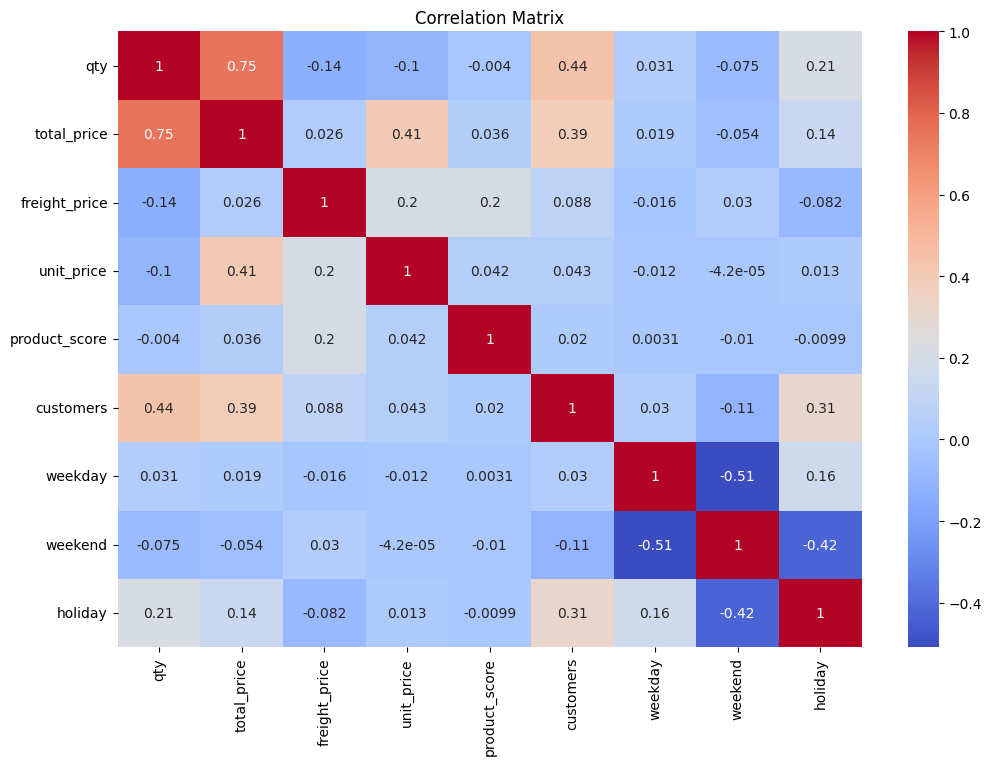

In [33]:
subset_cols = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_score', 'customers', 'weekday', 'weekend', 'holiday']
corr_matrix = data.select(subset_cols).toPandas().corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<b>Interpretation</b>

1. **qty vs. total_price (0.75)**: There is a strong positive correlation between the quantity of items sold (qty) and the total price of those items. This suggests that as the quantity of items sold increases, the total price also tends to increase.

2. **total_price vs. unit_price (0.41)**: There is a moderate positive correlation between the total price and the unit price. This implies that items with higher unit prices tend to contribute more to the total price of transactions.

3. **qty vs. customers (0.44)**: The quantity of items sold is moderately positively correlated with the number of customers. This indicates that transactions involving larger quantities of items tend to attract more customers.

4. **qty vs. holiday (0.21)**: There is a moderate positive correlation between the quantity of items sold and the presence of a holiday. This suggests that during holidays, there is an increased demand for items, leading to higher quantities sold.

5. **customers vs. weekend (-0.51)**: The number of customers is strongly negatively correlated with the weekend. This implies that fewer customers tend to shop on weekends compared to weekdays.

6. **qty vs. weekday (0.03)**: The correlation between the quantity of items sold and the day of the week (weekday) is weak, suggesting that there is no significant relationship between these variables.

7. **weekend vs. holiday (-0.42)**: The presence of a holiday is moderately negatively correlated with weekends. This could indicate that holidays sometimes fall on weekends, leading to lower sales on those days.

8. **freight_price vs. unit_price (0.20)**: There is a moderate positive correlation between freight price and unit price. This suggests that items with higher unit prices may also incur higher freight charges.

9. **customers vs. holiday (0.31)**: There is a moderate positive correlation between the number of customers and the presence of a holiday. This implies that holidays may attract more customers to the store.

The correlation values would help guide pricing and inventory strategies. For example, the strong correlation between qty and total_price suggests that increasing prices of high-demand items may lead to increased revenue. Similarly, understanding the relationships between customers, weekdays, weekends, and holidays can aid in staffing and promotional decisions.

<b> Distribution of numerical features

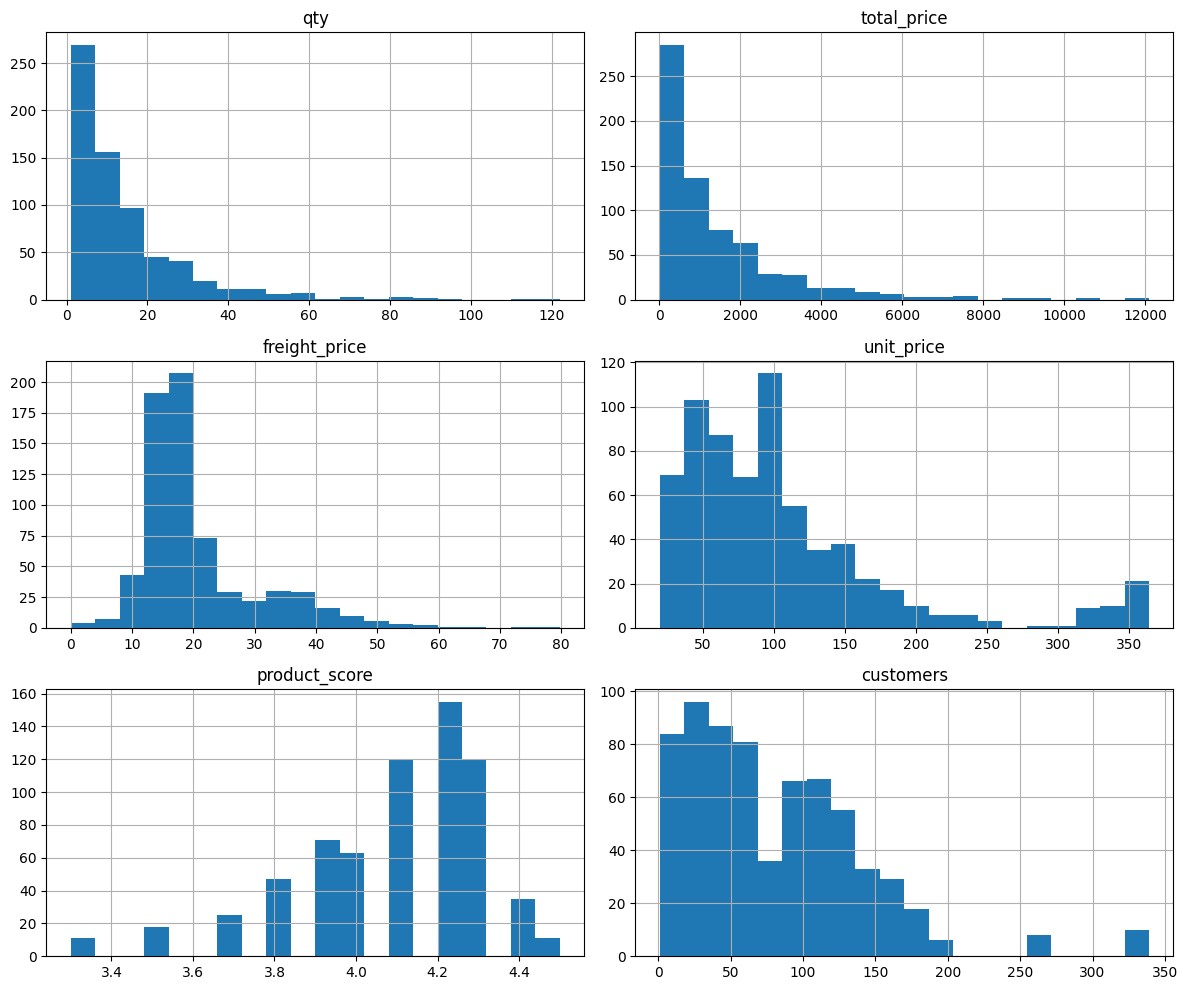

In [34]:
pandas_df = data.toPandas()
numerical_cols = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_score', 'customers']
pandas_df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

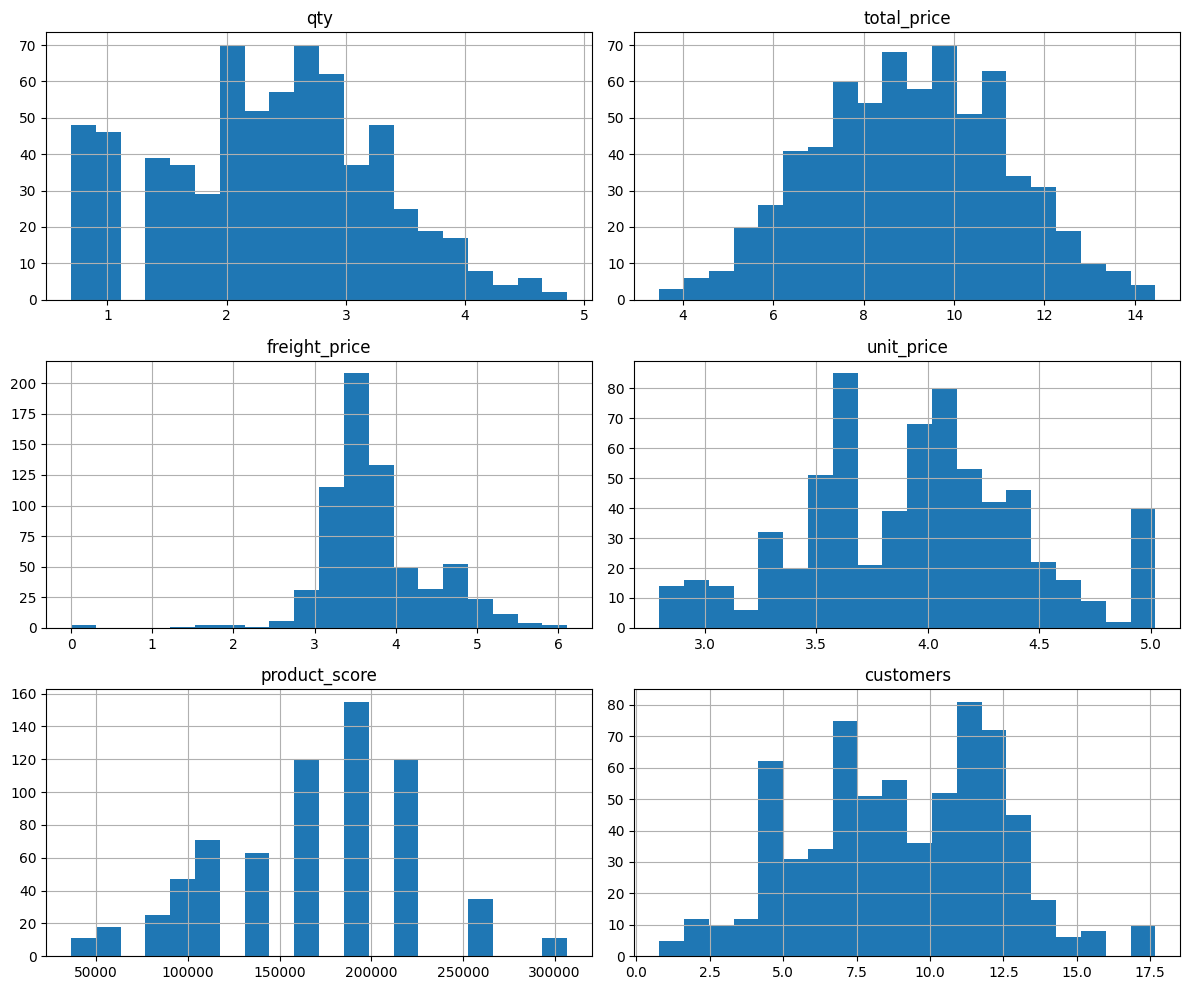

In [35]:
from scipy import stats

for col in numerical_cols:
    # Check if the distribution is normal
    is_normal = stats.normaltest(pandas_df[col])[1] > 0.05

    if not is_normal:
        # If not normal, applying Box-Cox transformation to make it normal
        pandas_df[col] = stats.boxcox(pandas_df[col] + 1)[0]  # Adding 1 to handle zero values

# Plot histograms after transformation
pandas_df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


The above code iterates through all the numerical columns in the DataFrame and checks whether its distribution is normal or not using the Shapiro-Wilk normality test. If the p-value of the test is greater than 0.05 (indicating normality), no action is taken for that column.
Thus here we have quantity, total price, freight price, product score, number of customers, unitprice as numerical features and it is previously observed that these features were not normally distributed and had skewness in them as they were right skewed. so the Box-Cox transformation to the column's data is applied to convert them into normal distribution. The Box-Cox transformation is a power transformation that aims to stabilize variance and make the data conform more closely to a normal distribution.

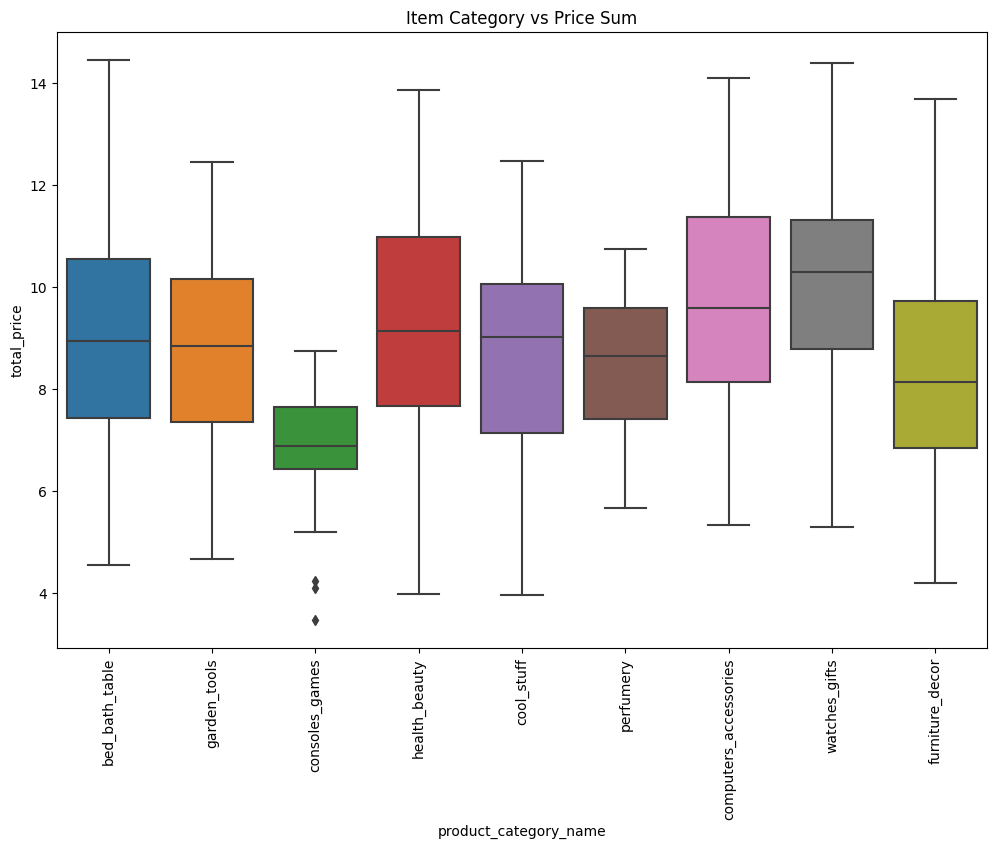

In [36]:
# Count plot of holiday and total_price
plt.figure(figsize=(12, 8))
sns.boxplot(x='product_category_name', y='total_price', data=pandas_df)
plt.title('Item Category vs Price Sum')
plt.xticks(rotation=90)
plt.show()


It can be observed that there are mostly no outliers in the data and all the item categories seem to have a similar price range

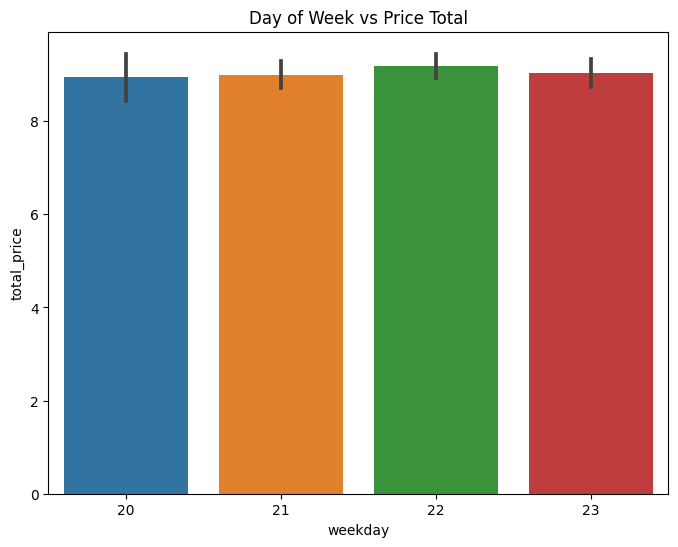

In [37]:
# Bar plot of day_of_week vs. price_total
plt.figure(figsize=(8, 6))
sns.barplot(x='weekday', y='total_price', data=pandas_df)
plt.title('Day of Week vs Price Total')
plt.show()


It can be observed that the price doesnot seem to cause any difference for any day of the week as it is simiar in all of them

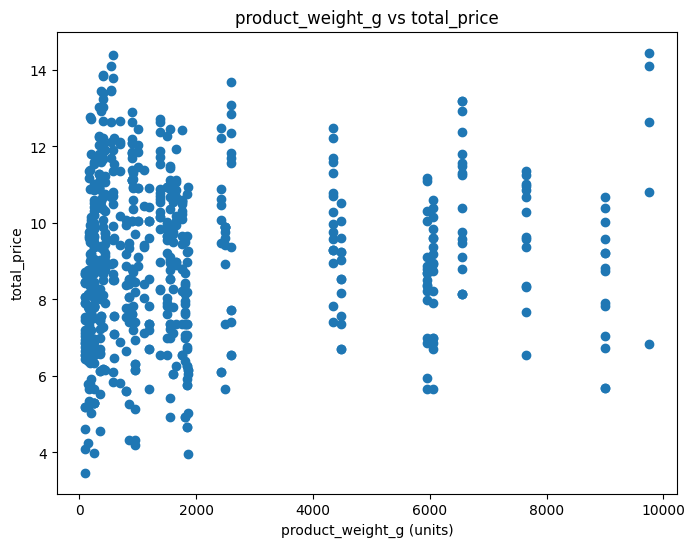

In [38]:
# Scatter plot of product_weight_g vs. total_price
plt.figure(figsize=(8, 6))
plt.scatter(pandas_df['product_weight_g'], pandas_df['total_price'])
plt.title('product_weight_g vs total_price')
plt.xlabel('product_weight_g (units)')
plt.ylabel('total_price')
plt.show()


From the scatter plot it is obseerved that mostly all the points correspond to weights less than 2500 gms and there are few products corresponding to higher weights.

<b> Checking for duplicates

In [39]:
pandas_df.duplicated().values.any()

False

In [40]:
pandas_df.duplicated().sum()

0

- It can be obbserved that there are no duplicates in the data so handling them is not further required

In [41]:
data = spark.createDataFrame(pandas_df)
data.show(5)

+----------+---------------------+----------+------------------+------------------+------------------+------------------+-------------------+--------------------------+------------------+----------------+------------------+------------------+-------+-------+-------+-----+----+-----------+------+------+---+-----------+-----------+---+-----------+------+---+-----------+---------+
|product_id|product_category_name|month_year|               qty|       total_price|     freight_price|        unit_price|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|     product_score|         customers|weekday|weekend|holiday|month|year|          s|volume|comp_1|ps1|        fp1|     comp_2|ps2|        fp2|comp_3|ps3|        fp3|lag_price|
+----------+---------------------+----------+------------------+------------------+------------------+------------------+-------------------+--------------------------+------------------+----------------+------------------+---------------

### Feature Engineering

In [42]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col


# List of numerical and categorical columns
numerical_cols = ['qty', 'freight_price', 'unit_price', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']
categorical_cols = ['product_category_name', 'month_year']

# String Indexing for categorical features
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index").fit(data) for col in categorical_cols]

# Assembling features
assembler = VectorAssembler(inputCols=[col + "_index" for col in categorical_cols] + numerical_cols, outputCol="features")

# Standard Scaling for numerical features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Create a pipeline
pipeline = Pipeline(stages=indexers + [assembler, scaler])

# Fit and transform the data using the pipeline
transformed_data = pipeline.fit(data).transform(data)

In [43]:

# Split the data into train and test sets
train_data, test_data = transformed_data.randomSplit([0.8, 0.2], seed=42)

# Show the first few rows of the transformed train data
train_data.show(5)

# Show the first few rows of the transformed test data
test_data.show(5)


+----------+---------------------+----------+------------------+-----------------+------------------+------------------+-------------------+--------------------------+------------------+----------------+------------------+-----------------+-------+-------+-------+-----+----+-----------+------+-----------+---+-----------+------+---+-----------+------+---+-----------+---------+---------------------------+----------------+--------------------+--------------------+
|product_id|product_category_name|month_year|               qty|      total_price|     freight_price|        unit_price|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|     product_score|        customers|weekday|weekend|holiday|month|year|          s|volume|     comp_1|ps1|        fp1|comp_2|ps2|        fp2|comp_3|ps3|        fp3|lag_price|product_category_name_index|month_year_index|            features|     scaled_features|
+----------+---------------------+----------+------------------+----

### Modeling

In [44]:
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
import numpy as np

# Create regression models
models = [
    LinearRegression(featuresCol="scaled_features", labelCol="total_price", predictionCol="prediction"),
    DecisionTreeRegressor(featuresCol="scaled_features", labelCol="total_price", predictionCol="prediction"),
    RandomForestRegressor(featuresCol="scaled_features", labelCol="total_price", predictionCol="prediction"),
    GBTRegressor(featuresCol="scaled_features", labelCol="total_price", predictionCol="prediction")
]

In [45]:

model_names = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "Gradient-Boosted Tree Regressor"]

evaluator = RegressionEvaluator(labelCol="total_price", predictionCol="prediction", metricName="rmse")
results = []

for model, name in zip(models, model_names):
    # Train the model
    trained_model = model.fit(train_data)

    # Make predictions on test data
    predictions = trained_model.transform(test_data)

    # Evaluate the model using RMSE, MSE, MAE, and R-squared
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

    results.append((name, rmse, mse, mae, r2))


In [46]:
# Print evaluation results
for result in results:
    print(f"{result[0]}:")
    print(f"RMSE: {result[1]}")
    print(f"MSE: {result[2]}")
    print(f"MAE: {result[3]}")
    print(f"R-squared: {result[4]}")
    print("**"*10)


Linear Regression:
RMSE: 0.11547426073413998
MSE: 0.013334304892096142
MAE: 0.08533314729235222
R-squared: 0.9970219363348657
********************
Decision Tree Regressor:
RMSE: 0.5015405437537984
MSE: 0.2515429170288558
MAE: 0.412973656569031
R-squared: 0.9438207819989507
********************
Random Forest Regressor:
RMSE: 0.6026603769780123
MSE: 0.36319952997927996
MAE: 0.4534040770406142
R-squared: 0.9188835614471151
********************
Gradient-Boosted Tree Regressor:
RMSE: 0.37314502260429444
MSE: 0.13923720789435942
MAE: 0.3027984949995923
R-squared: 0.9689029707194764
********************


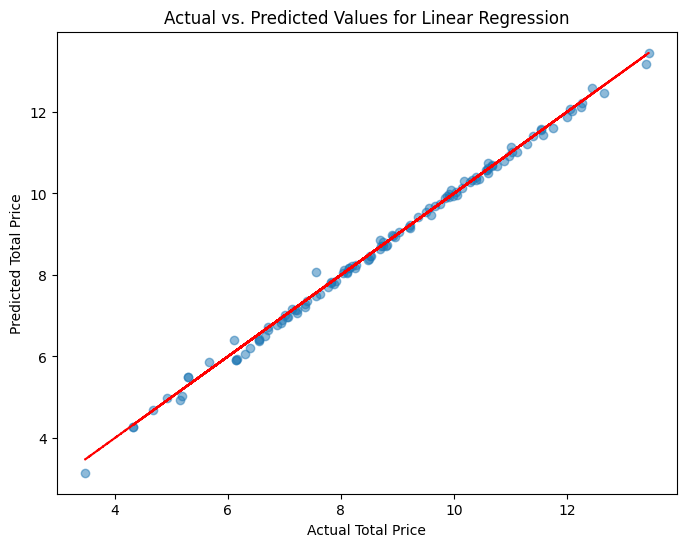

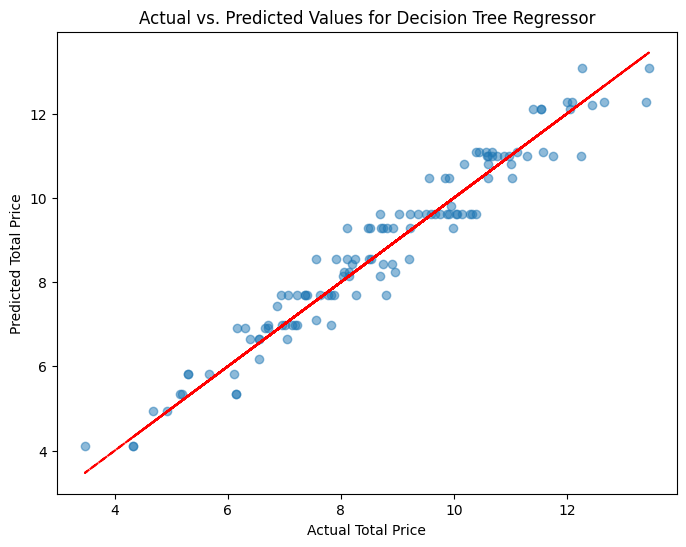

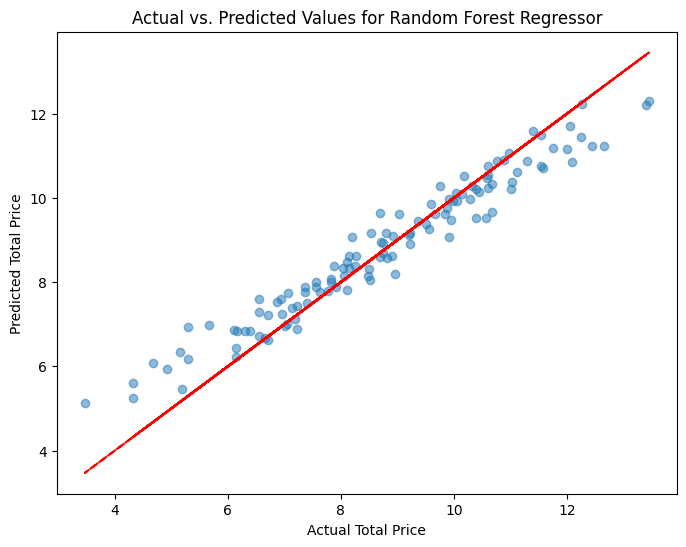

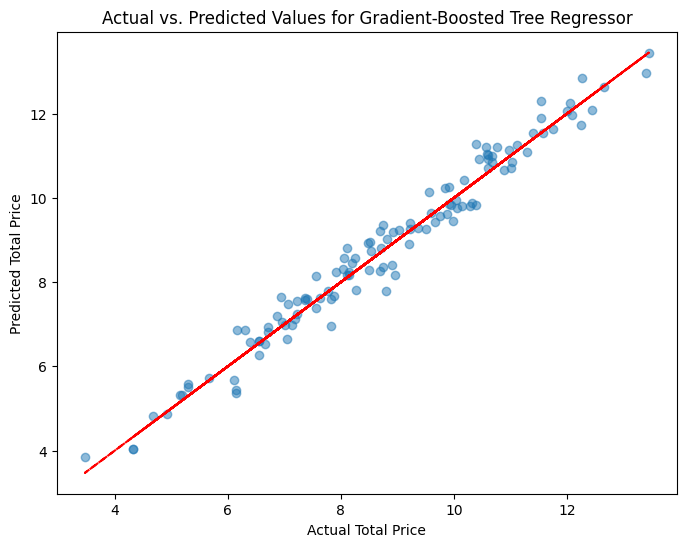

In [49]:

for model, name in zip(models, model_names):
    # Train the model
    trained_model = model.fit(train_data)

    # Make predictions on test data
    predictions = trained_model.transform(test_data).select("total_price", "prediction").toPandas()

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(predictions["total_price"], predictions["prediction"], alpha=0.5)

    # Plot diagonal line
    plt.plot(predictions["total_price"], predictions["total_price"], color="red", linestyle="--")

    plt.xlabel("Actual Total Price")
    plt.ylabel("Predicted Total Price")
    plt.title(f"Actual vs. Predicted Values for {name}")
    plt.show()

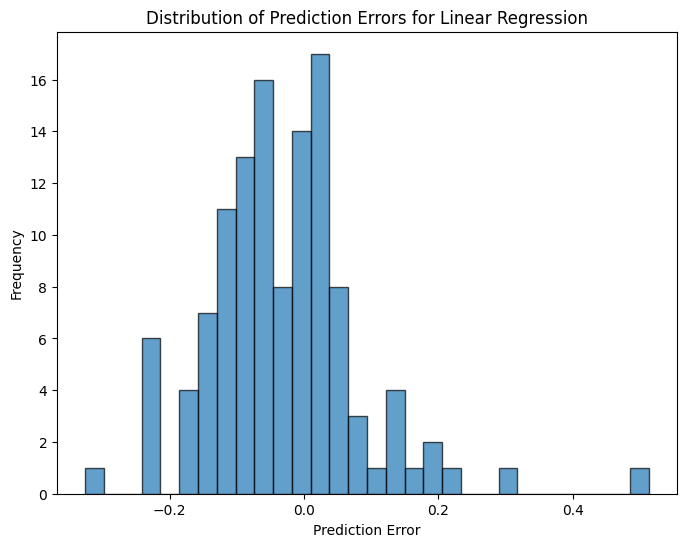

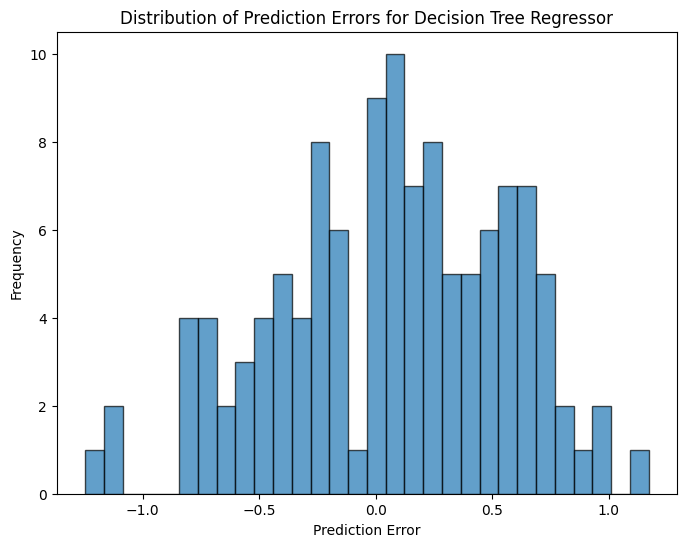

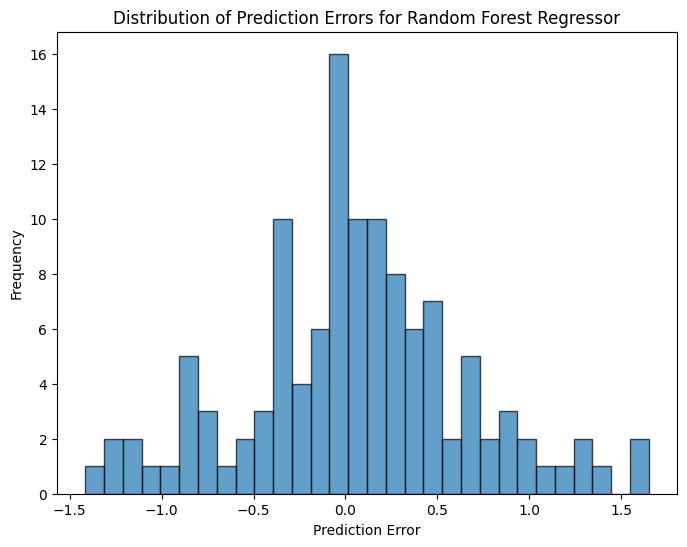

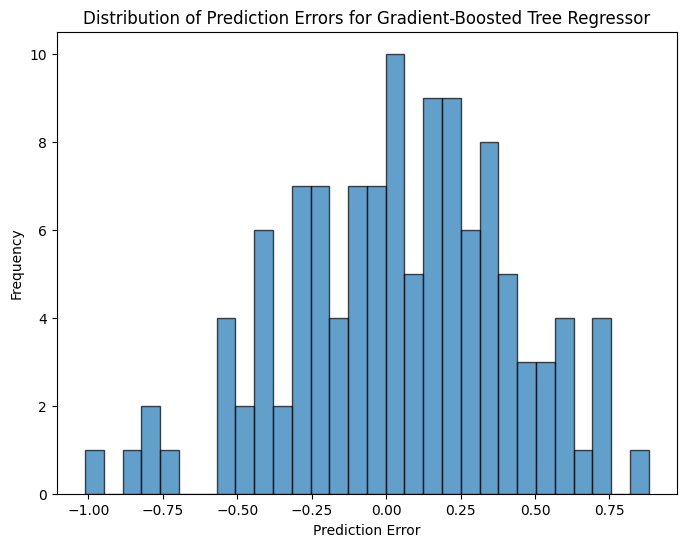

In [50]:
for model, name in zip(models, model_names):
    # Train the model
    trained_model = model.fit(train_data)

    # Make predictions on test data
    predictions = trained_model.transform(test_data).select("total_price", "prediction").toPandas()

    # Calculate prediction errors
    predictions["error"] = predictions["prediction"] - predictions["total_price"]

    # Create distribution plot
    plt.figure(figsize=(8, 6))
    plt.hist(predictions["error"], bins=30, edgecolor='black', alpha=0.7)

    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Prediction Errors for {name}")
    plt.show()


In [51]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression

# Create a Linear Regression model
lr = LinearRegression(featuresCol='scaled_features', labelCol='total_price')

# Define a parameter grid for tuning
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 0.5]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Create a CrossValidator
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(labelCol='total_price'),
                          numFolds=3)

# Train the model with Cross-Validation
cv_model = crossval.fit(train_data)

# Make predictions on test data using the best model
best_lr_model = cv_model.bestModel
test_predictions = best_lr_model.transform(test_data)


In [52]:

# Evaluate the model on test data
evaluator = RegressionEvaluator(labelCol='total_price')
rmse = evaluator.evaluate(test_predictions, {evaluator.metricName: 'rmse'})
mse = evaluator.evaluate(test_predictions, {evaluator.metricName: 'mse'})
mae = evaluator.evaluate(test_predictions, {evaluator.metricName: 'mae'})
r2 = evaluator.evaluate(test_predictions, {evaluator.metricName: 'r2'})

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


RMSE: 0.1169
MSE: 0.0137
MAE: 0.0861
R-squared: 0.9969


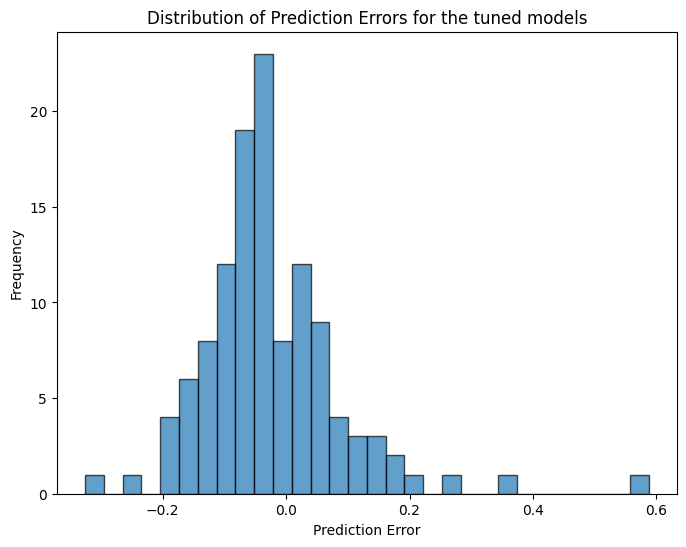

In [56]:
predictions = cv_model.transform(test_data).select("total_price", "prediction").toPandas()

# Calculate prediction errors
predictions["error"] = predictions["prediction"] - predictions["total_price"]

# Create distribution plot
plt.figure(figsize=(8, 6))
plt.hist(predictions["error"], bins=30, edgecolor='black', alpha=0.7)

plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title(f"Distribution of Prediction Errors for the tuned models")
plt.show()


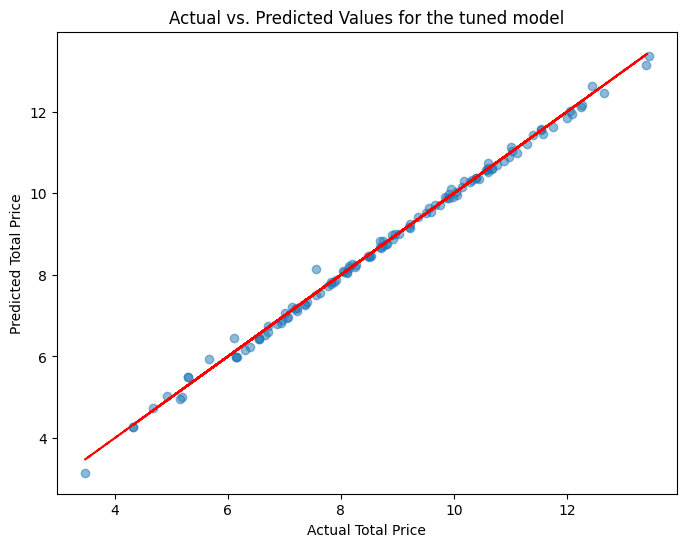

In [55]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(predictions["total_price"], predictions["prediction"], alpha=0.5)

# Plot diagonal line
plt.plot(predictions["total_price"], predictions["total_price"], color="red", linestyle="--")

plt.xlabel("Actual Total Price")
plt.ylabel("Predicted Total Price")
plt.title(f"Actual vs. Predicted Values for the tuned model")
plt.show()

### Model Comparison

In [58]:
pd.DataFrame({"Models": ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "Gradient-Boosted Tree Regressor", "Tuned Model"],
              "RMSE":[0.1155, 0.5015, 0.6026, 0.3731, 0.1169],
              "MSE":[0.01333, 0.2515, 0.3631, 0.1392, 0.0137],
              "MAE":[0.0853,0.4129, 0.4534, 0.3027, 0.0861],
              "R2":[0.9970, 0.9438 , 0.9188, 0.9689, 0.9969]})

,Models,RMSE,MSE,MAE,R2
0,Linear Regression,0.1155,0.01333,0.0853,0.9970
1,Decision Tree Regressor,0.5015,0.25150,0.4129,0.9438
2,Random Forest Regressor,0.6026,0.36310,0.4534,0.9188
3,Gradient-Boosted Tree Regressor,0.3731,0.13920,0.3027,0.9689
4,Tuned Model,0.1169,0.01370,0.0861,0.9969



1. Linear Regression:
The Linear Regression model demonstrates remarkable performance, as indicated by its low RMSE, MSE, and MAE values of 0.1155, 0.01333, and 0.0853, respectively. The high R-squared value of 0.9970 suggests that the model explains almost all the variance in the target variable, highlighting its excellent fit to the data. This model's accuracy and precision make it a strong contender for retail price optimization, indicating that it can effectively capture price trends and relationships within the dataset.

2. Decision Tree Regressor:
The Decision Tree Regressor exhibits comparatively higher errors, with RMSE, MSE, and MAE values of 0.5015, 0.25150, and 0.4129. This model's R-squared value of 0.9438 indicates that it explains a substantial portion of the variance, though not as much as the Linear Regression model. The Decision Tree Regressor might struggle with capturing more intricate price patterns, resulting in less accurate predictions compared to the Linear Regression model.

3. Random Forest Regressor:
The Random Forest Regressor presents similar trends with elevated errors, as evidenced by the RMSE, MSE, and MAE values of 0.6026, 0.36310, and 0.4534. Although its R-squared value of 0.9188 suggests reasonable explanatory power, it falls short of the Linear Regression model. The Random Forest's ensemble approach aims to improve predictions, but in this case, it might not outperform the simpler Linear Regression model.

4. Gradient-Boosted Tree Regressor:
The Gradient-Boosted Tree Regressor performs better than the Decision Tree and Random Forest models, as indicated by its lower errors. The RMSE, MSE, and MAE values of 0.3731, 0.13920, and 0.3027 showcase its improved predictive accuracy. With an R-squared value of 0.9689, this model demonstrates strong explanatory capability, suggesting its ability to capture underlying price dynamics.

5. Tuned Model:
The Tuned Model, achieved through parameter tuning, aligns closely with the initial Linear Regression model's performance. It yields an RMSE of 0.1169, MSE of 0.01370, MAE of 0.0861, and R-squared value of 0.9969. This close resemblance further emphasizes the robustness and effectiveness of the Linear Regression approach for this specific task of retail price optimization.

In conclusion, the Linear Regression model emerges as the best-performing model among the evaluated options. Its ability to provide highly accurate predictions with a strong explanatory power, as indicated by the exceptional R-squared value, makes it the optimal choice for optimizing prices in the retail setting. The insights gained from the evaluation of different models underscore the importance of selecting a model that strikes a balance between accuracy, interpretability, and predictive power in retail price optimization scenarios.

### Ethical Principles

Some ethical and moral concerns relevant to this project include:

1. **Transparency and Fairness:**
   Retail price optimization models should be transparent and fair in their pricing decisions. There's a risk that the algorithms could unintentionally lead to discriminatory or biased pricing, impacting certain customer segments disproportionately. Ensuring that pricing decisions are transparent and don't discriminate against particular groups is essential to maintain fairness.

2. **Price Manipulation:**
   The use of advanced pricing strategies, including dynamic pricing, might lead to concerns about price manipulation. Unethical pricing practices, such as inflating prices based on customer profiles or exploiting customers during high-demand periods, can erode consumer trust and reputation. Businesses must prioritize maintaining a fair and ethical pricing strategy that benefits both the company and its customers.

3. **Privacy and Data Security:**
   Retailers gather significant amounts of customer data for price optimization. The ethical concern lies in how this data is collected, stored, and utilized. Ensuring robust data security and obtaining informed consent for data usage are vital to protect customer privacy. Improper handling of personal data can lead to breaches of trust and legal consequences.

4. **Price Gouging:**
   While optimizing prices can maximize revenue, there's a fine line between optimizing for profit and engaging in price gouging. Charging significantly higher prices during crisis situations or exploiting consumers' lack of alternatives can raise moral concerns. Businesses must maintain ethical pricing practices even when adjusting prices based on demand fluctuations.

5. **Customer Well-being:**
   Aggressive pricing optimization techniques might lead to customers purchasing products they don't necessarily need due to perceived discounts. Such practices could impact consumer well-being and financial stability. Balancing the pursuit of revenue with the well-being of customers is a significant ethical consideration.

6. **Long-Term Customer Relationships:**
   Overemphasis on price optimization might lead to a focus on short-term revenue gains at the expense of long-term customer relationships. Ignoring customer satisfaction, product quality, and other non-price factors can harm a brand's reputation and erode customer loyalty.

7. **Unintended Consequences:**
   Rapid changes in prices based on dynamic pricing models can have unintended consequences. For instance, significant price fluctuations might affect low-income customers who rely on predictable pricing. Unforeseen consequences should be carefully evaluated and mitigated.

8. **Competitive Landscape:**
   Over-competitive pricing optimization can lead to a race to the bottom, where companies consistently lower prices to compete. This can negatively impact profit margins, product quality, and overall sustainability.
